In [1]:
# import packages and functions
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import netCDF4 as nc
import gsw

In [2]:
import shapely.geometry as sg
from shapely import Point

# Figure out which floats we need for the dataset

We need:
- velocity field for the first two years
- floats (X,Y,Z, depth, rho, salt, temp) for the first two years

In [7]:
# we have months where there was a polynya (<12 should correspond to the first year)
months = np.loadtxt("months.txt")
months.shape

(6813,)

In [8]:
months[months<13].shape

(3397,)

In [9]:
path = "/scratch/mmurakami/WAOM/"

In [10]:
# first dataset (years 1-2)
filename = path + "waom_2years/ocean_flt_select.nc"
ds1 = xr.open_dataset(filename)
a = ds1.Xgrid[-1].values
ds1

<xarray.Dataset>
Dimensions:  (ocean_time: 70081, drifter: 6813)
Dimensions without coordinates: ocean_time, drifter
Data variables:
    Xgrid    (ocean_time, drifter) float32 ...
    Ygrid    (ocean_time, drifter) float32 ...
    Zgrid    (ocean_time, drifter) float32 ...

In [13]:
filename = path + "waom_2years/ocean_flt_select2.nc"
ds2 = xr.open_dataset(filename)
ds2

<xarray.Dataset>
Dimensions:  (ocean_time: 70081, drifter: 6813)
Dimensions without coordinates: ocean_time, drifter
Data variables:
    Zgrid    (ocean_time, drifter) float32 ...
    rho      (ocean_time, drifter) float32 ...
    temp     (ocean_time, drifter) float32 ...
    salt     (ocean_time, drifter) float32 ...

In [16]:
filename = path + "waom_2years/ocean_flt_select3.nc"
dsd = xr.open_dataset(filename)
dsd

<xarray.Dataset>
Dimensions:  (ocean_time: 70081, drifter: 6813)
Dimensions without coordinates: ocean_time, drifter
Data variables:
    depth    (ocean_time, drifter) float32 ...

In [58]:
times.shape

(3895,)

In [61]:
Xgrid = ds1.Xgrid.values
Ygrid = ds1.Ygrid.values
# Zgrid = ds1.Zgrid.values
print('a')
rho = ds2.rho.values
temp = ds2.temp.values
salt = ds2.salt.values
print('b')
depth = dsd.depth.values

a
b


In [62]:
def move_nans_to_end(Xgrid):
    # Get shape
    m, n = Xgrid.shape  
    result = np.full_like(Xgrid, np.nan)  # Initialize result with NaNs

    for col in range(n):
        non_nan_values = Xgrid[:, col][~np.isnan(Xgrid[:, col])]  # Extract non-NaN values
        result[:len(non_nan_values), col] = non_nan_values  # Place them at the top

    return result

In [63]:
Xgrid_rearranged = move_nans_to_end(Xgrid)
Ygrid_rearranged = move_nans_to_end(Ygrid)
rho_rearranged = move_nans_to_end(rho)
print('a')
temp_rearranged = move_nans_to_end(temp)
salt_rearranged = move_nans_to_end(salt)
rho_rearranged = move_nans_to_end(rho)

a


In [102]:
Xgrid_rearranged[35040][~np.isnan(Xgrid_rearranged[35040])].shape

(3427,)

In [89]:
# Define dimensions and create xarray Dataset
ds = xr.Dataset(
    {
        "Xgrid": (["time", "drifter"], Xgrid_rearranged[:,fy]),
        "Ygrid": (["time", "drifter"], Ygrid_rearranged[:,fy]),
        "Zgrid": (["time", "drifter"], Zgrid_rearranged[:,fy]),
        "rho": (["time", "drifter"], rho_rearranged[:,fy]),
        "temp": (["time", "drifter"], temp_rearranged[:,fy]),
        "salt": (["time", "drifter"], salt_rearranged[:,fy]),
        "depth": (["time", "driftr"], depth_rearranged[:,fy]),
    },
    coords={
        "time": np.arange(time_steps),  # Replace with actual time values if available
        "drifter": np.arange(num_drifters),
    },
)

TypeError: slice indices must be integers or None or have an __index__ method

# times of release of these

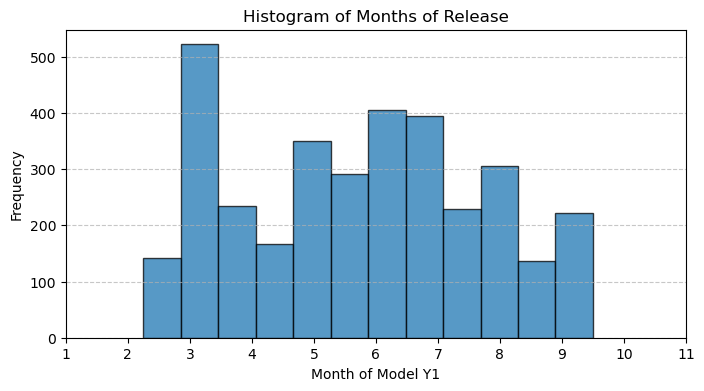

In [18]:
times = np.loadtxt("times.txt") # timesteps
months = np.loadtxt("months.txt")

a = months[months>12]
b = months[months<12]

fig = plt.figure(figsize=(8,4))

ax = plt.subplot(111)
ax.hist(b, bins=12, edgecolor='black', alpha=0.75)
ax.set_xlabel('Month of Model Y1')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Months of Release')
ax.set_xticks(range(1, 12))  # Show all days in a month
ax.grid(axis='y', linestyle='--', alpha=0.7)

# look at water mass definitions

tmin, tmax, smin, smax sizes=, -3.3 3.63 30.69 38.38


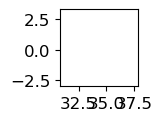

In [38]:
# end of one year will be at 35040 
# add the polygons and the points
smin = 31 - (0.01 * 31)    #salt_ctrl_subregR.min - (0.01 * salt_ctrl_subregR.min)
smax = 38. + (0.01 * 38.)    #salt_ctrl_subregR.max + (0.01 * salt_ctrl_subregR.max)
tmin = -3 + (0.1 * -3)       #temp_ctrl_subregR.min - (0.1 * temp_ctrl_subregR.max)
tmax = 3.3 + (0.1 * 3.3)       #temp_ctrl_subregR.max + (0.1 * temp_ctrl_subregR.max)
print('tmin, tmax, smin, smax sizes=,', tmin, tmax, smin, smax)
# Calculate how many gridcells we need in the x and y dimensions
xdim = 30
ydim = 30
# Create empty grid of zeros
dens2 = np.zeros((ydim,xdim))
# Create temp and salt vectors of appropiate dimensions
ti1 = np.linspace(-3,3.3,ydim)
si1 = np.linspace(31,38,xdim)
Freez_temp = gsw.CT_freezing(si1,0,0)

Si, Ti = np.meshgrid(si1, ti1, sparse=False, indexing='ij')
# Loop to fill in grid with densities
for j in range(0,int(ydim)):
    for i in range(0, int(xdim)):
        #print(si[i],ti[j])
        dens2[j,i]=gsw.rho(si1[i],ti1[j],0)
        # Substract 1000 to convert to sigma-0
dens2 = dens2 - 1000

# convert to practical/potential
long = 73.5089
lat = -66.8245
ti = gsw.pt_from_CT(si1,ti1)
si = gsw.SP_from_SA(si1,0,long,lat)

# create the polygons for the next plot
fig = plt.figure(figsize=(1,1))
ax = fig.add_subplot(1, 1, 1)

# add aabw values
cs = ax.contourf(si, ti, dens2, levels=[27.82,31],colors="black", zorder=1,alpha=0,linestyles='-.')
cl=plt.clabel(cs,fontsize=10,inline=False,fmt="%.2f")
# get the dens2ity vertices
p = cs.collections[0].get_paths()[0]
v = p.vertices
# get the TS vertices
s = np.array([34.5,36,36,34.5,34.5])
t = np.array([-3,-3,0.1,0.1,-3])
b = np.array([[a,b] for a,b in zip(s,t)])
# # find intersection and plot
a = sg.Polygon(v)
b = sg.Polygon(b)
ft = Freez_temp
si2 = si.copy()
si2 = np.append(si2,[max(si2),min(si2),min(si2)])
ft = np.append(ft,[0.1,0.1,max(ft)])
c = np.array([[a,b] for a,b in zip(si2,ft)])
c = sg.Polygon(c)
d = a.intersection(b)
aabw = c.intersection(d)

# find the winter water values
cs = ax.contourf(si, ti, dens2, levels=[27.55,27.73],colors="black", zorder=1,alpha=0,linestyles='-.')
p = cs.collections[0].get_paths()[0]
v = p.vertices
ft = Freez_temp
si2 = si.copy()
si2 = np.append(si2,[max(si2),min(si2),min(si2)])
ft = np.append(ft,[-1.5,-1.5,max(ft)])
b = np.array([[a,b] for a,b in zip(si2,ft)])
a = sg.Polygon(v)
b = sg.Polygon(b)
ww = a.intersection(b)

# find the mcdw values
cs = ax.contourf(si, ti, dens2, levels=[27.73,27.82],colors="black", zorder=1,alpha=0,linestyles='-.')
p = cs.collections[0].get_paths()[0]
v = p.vertices
ft = Freez_temp
si2 = si.copy()
si2 = np.append(si2,[max(si2),min(si2),min(si2)])
ft = np.append(ft,[1.5,1.5,max(ft)])
b = np.array([[a,b] for a,b in zip(si2,ft)])
a = sg.Polygon(v)
b = sg.Polygon(b)
mcdw = a.intersection(b)

# find the aasw values
cs = ax.contourf(si, ti, dens2, levels=[24,27.73],colors="black", zorder=1,alpha=0,linestyles='-.')
p = cs.collections[0].get_paths()[0]
v = p.vertices
a = sg.Polygon(v)              # first shape in dens2ity
sx = np.array([34.5,34.5,31,31])
sy = np.array([-3,3.5,3.5,-3])
ss = np.array([[a,b] for a,b in zip(sx,sy)])
b = sg.Polygon(ss)             # second shape in salinity
ft = Freez_temp
ft = np.append(ft,[3.5,3.5])
si2 = si.copy()
si2 = np.append(si2,[35,31])
ta = np.array([[a,b] for a,b in zip(si2,ft)])
c = sg.Polygon(ta)              # third shape in temperature
d = b.intersection(c)
aasw = d.intersection(a)

# --- DSW Polygon ---
# Extract density contour polygon
cs = ax.contourf(si, ti, dens2, levels=[27.82, 31], colors="black", zorder=1, alpha=0, linestyles='-.')
p = cs.collections[0].get_paths()[0]
v = p.vertices
a = sg.Polygon(v)
# DSW polygon boundaries
ft_upper = Freez_temp + 0.1
t_lower = -2.5
# Salinity arrays
si_upper = si1
si_lower = si1[::-1]
# Create polygon
poly_si = np.concatenate([si_upper, si_lower])
poly_t = np.concatenate([ft_upper, np.full_like(si_lower, t_lower)])
polygon_pts = np.column_stack([poly_si, poly_t])
c = sg.Polygon(polygon_pts)

# Intersection
dsw_poly = c.intersection(a)
# Ensure it's a Polygon (not MultiPolygon)
if dsw_poly.is_empty:
    dsw = sg.Polygon()
elif dsw_poly.geom_type == 'Polygon':
    dsw = dsw_poly
else:  # MultiPolygon case
    dsw = max(dsw_poly.geoms, key=lambda g: g.area)  # Take largest part

# --- mSW Polygon ---

# Extract density contour polygon
cs = ax.contourf(si, ti, dens2, levels=[27.82, 31], colors="black", zorder=1, alpha=0, linestyles='-.')
p = cs.collections[0].get_paths()[0]
v = p.vertices
a = sg.Polygon(v)

# mSW polygon boundaries
ft_upper = Freez_temp + 0.1
t_lower = -0.4

# Salinity arrays
si_upper = si1
si_lower = si1[::-1]

# Create polygon
poly_si = np.concatenate([si_upper, si_lower])
poly_t = np.concatenate([ft_upper, np.full_like(si_lower, t_lower)])
polygon_pts = np.column_stack([poly_si, poly_t])
c = sg.Polygon(polygon_pts)

# Intersection
msw_poly = c.intersection(a).difference(dsw)  # Remove DSW region

# Ensure it's a Polygon (not MultiPolygon)
if msw_poly.is_empty:
    msw = sg.Polygon()
elif msw_poly.geom_type == 'Polygon':
    msw = msw_poly
else:  # MultiPolygon case
    msw = max(msw_poly.geoms, key=lambda g: g.area)  # Take largest part



# add ISW values
cs = ax.contourf(si, ti, dens2, levels=[25,27.82],colors="black", zorder=1,alpha=0,linestyles='-.')
p = cs.collections[0].get_paths()[0]
v = p.vertices
a = sg.Polygon(v)
ft = Freez_temp# - 0.05
si2 = si.copy()
si2 = np.append(si2,[max(si2),min(si2),min(si2)])
ft = np.append(ft,[-3,-3,max(ft)])
b = np.array([[a,b] for a,b in zip(si2,ft)])
b = sg.Polygon(b)
isw = b.intersection(a)
#isw = isw.difference(dsw)
isw = isw.difference(aabw)
#ucdw = ucdw.difference(mcdw)
aasw = aasw.difference(ww)
#aasw = aasw.difference(ucdw)

# find the aaiw values
cs = ax.contourf(si, ti, dens2, levels=[27.2,27.4],colors="black", zorder=1,alpha=0,linestyles='-.')
p = cs.collections[0].get_paths()[0]
v = p.vertices
a = sg.Polygon(v)              # first shape in dens2ity
sx = np.array([34.6,34.6,32,32])
sy = np.array([2,3.5,3.5,2])
ss = np.array([[a,b] for a,b in zip(sx,sy)])
b = sg.Polygon(ss)             # second shape in salinity
ft = Freez_temp
ft = np.append(ft,[3.5,3.5])
si2 = si.copy()
si2 = np.append(si2,[35,31])
ta = np.array([[a,b] for a,b in zip(si2,ft)])
c = sg.Polygon(ta)              # third shape in temperature
d = b.intersection(c)
aaiw = d.intersection(a)

Text(0, 0.5, 'Potential Temperature')

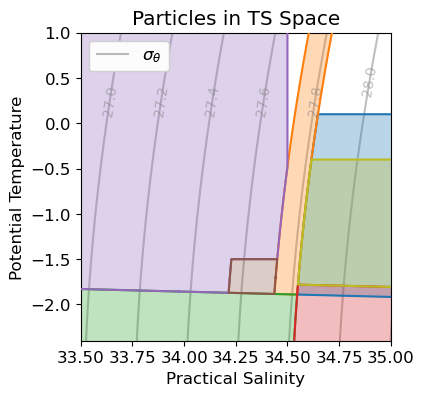

In [39]:
#POLYGONS
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(1, 1, 1)
plt.ylim(-2.4,1)
plt.xlim(33.5,35)
#plt.xlim(xedges[0], xedges[-1])
#plt.ylim(yedges[0], yedges[-1])
shapes = np.array([])
shapelabels = np.array([])
plt.rcParams.update({'font.size': 12})

# add the potential density lines
cs = ax.contour(si, ti, dens2, colors="grey", zorder=1,alpha=0.5,levels=np.arange(24,28.5,0.2))
cl=plt.clabel(cs,fontsize=10,inline=False,fmt="%.1f")
h, l = cs.legend_elements()
h = np.array([h[0]],dtype=object)
l = np.array(["$\sigma_{θ}$"])

# AABW values
x, y = aabw.exterior.xy
aabw2 = plt.plot(x, y,label="AABW",color="tab:blue",zorder=5)
plt.fill(x, y,alpha=0.3,color="tab:blue")
shapes = np.append(shapes,aabw2)
shapelabels = np.append(shapelabels,"AABW*")
# MCDW values
x, y = mcdw.exterior.xy
mcdw2 = plt.plot(x, y,label="mCDW",color="tab:orange",zorder=5)
plt.fill(x, y,alpha=0.3,color="tab:orange")
shapes = np.append(shapes,mcdw2)
shapelabels = np.append(shapelabels,"mCDW")

# # ISW values
x, y = isw.exterior.xy
isw2 = plt.plot(x, y,label="ISW",color="tab:green",zorder=5)
plt.fill(x, y,alpha=0.3,color="tab:green")
shapes = np.append(shapes,isw2)
shapelabels = np.append(shapelabels,"ISW")
# # DSW values
x, y = dsw.exterior.xy
dsw2 = plt.plot(x, y,label="DSW",color="tab:red",zorder=5)
plt.fill(x, y,alpha=0.3,color="tab:red")
shapes = np.append(shapes,dsw2)
shapelabels = np.append(shapelabels,"DSW")

# # MSW values
x, y = msw.exterior.xy
msw2 = plt.plot(x, y,label="mSW*",color="tab:olive",zorder=5)
plt.fill(x, y,alpha=0.3,color="tab:olive")
shapes = np.append(shapes,msw2)
shapelabels = np.append(shapelabels,"mSW*")

# # AASW values
x, y = aasw.exterior.xy
aasw2 = plt.plot(x, y,label="AASW",color="tab:purple",zorder=5)
plt.fill(x, y,alpha=0.3,color="tab:purple")
shapes = np.append(shapes,aasw2)
shapelabels = np.append(shapelabels,"AASW")

# # WW values
x, y = ww.exterior.xy
ww2 = plt.plot(x, y,label="WW",color="tab:brown",zorder=5)
plt.fill(x, y,alpha=0.3,color="tab:brown")
shapes = np.append(shapes,ww2)
shapelabels = np.append(shapelabels,"WW")

# labels and plot
legend1 = plt.legend(h,l, loc=2)
plt.gca().add_artist(legend1)
#plt.legend(shapes,shapelabels, loc=1)
# plt.scatter(salt.flatten(),temp.flatten(),s=0.1)

# plt.title("Neutral and potential density of water masses")
plt.title("Particles in TS Space")
plt.xlabel('Practical Salinity')
plt.ylabel('Potential Temperature')

In [40]:
temp = ds2['temp'].values
salt = ds2['salt'].values

# try to move nans to end for first file so we can cut it off

In [55]:
ds1

<xarray.Dataset>
Dimensions:  (ocean_time: 70081, drifter: 6813)
Dimensions without coordinates: ocean_time, drifter
Data variables:
    Xgrid    (ocean_time, drifter) float32 ...
    Ygrid    (ocean_time, drifter) float32 ...
    Zgrid    (ocean_time, drifter) float32 ...

In [57]:
dstest = "/scratch/mmurakami/WAOM/drifter_data_all_withdepth.nc"
dsx = xr.open_dataset(dstest)
dsx

<xarray.Dataset>
Dimensions:  (time: 194353, drifter: 3895, driftr: 3895)
Coordinates:
  * time     (time) int64 0 1 2 3 4 5 ... 194348 194349 194350 194351 194352
  * drifter  (drifter) int64 0 1 2 3 4 5 6 ... 3889 3890 3891 3892 3893 3894
Dimensions without coordinates: driftr
Data variables:
    Xgrid    (time, drifter) float32 ...
    Ygrid    (time, drifter) float32 ...
    Zgrid    (time, drifter) float32 ...
    rho      (time, drifter) float32 ...
    temp     (time, drifter) float32 ...
    salt     (time, drifter) float32 ...
    depth    (time, driftr) float32 ...

# look at just the ones we have already created

In [103]:
filename = "/scratch/mmurakami/WAOM/categorized.nc"
ds = xr.load_dataset(filename)

In [104]:
ds1 = "/scratch/mmurakami/WAOM/drifter_data_all_withdepth.nc"
ds1 = xr.load_dataset(ds1)

In [105]:
arr = ds.categorized[10]
unique_values, counts = np.unique(arr, return_counts=True)
names = ['AABW', 'MCDW', 'ISW', 'DSW', 'AASW', 'WW', 'mSW','beached']
for i,j in zip(unique_values,counts):
    print(names[int(i)],j,j/3895)

MCDW 1160 0.29781771501925547
ISW 12 0.0030808729139922978
DSW 622 0.15969191270860078
AASW 1460 0.3748395378690629
WW 469 0.12041078305519898
mSW 172 0.044159178433889605


In [107]:
t1 = ds1.temp[0]
s1 = ds1.salt[0]

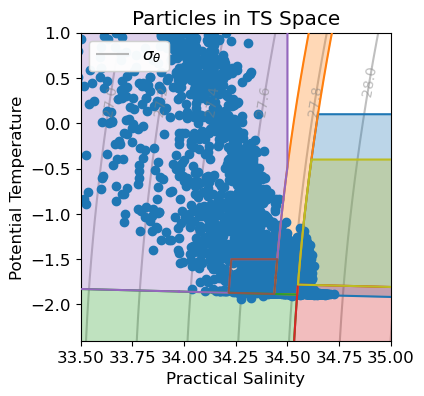

In [108]:
#POLYGONS
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(1, 1, 1)
plt.ylim(-2.4,1)
plt.xlim(33.5,35)
#plt.xlim(xedges[0], xedges[-1])
#plt.ylim(yedges[0], yedges[-1])
shapes = np.array([])
shapelabels = np.array([])
plt.rcParams.update({'font.size': 12})

# add the potential density lines
cs = ax.contour(si, ti, dens2, colors="grey", zorder=1,alpha=0.5,levels=np.arange(24,28.5,0.2))
cl=plt.clabel(cs,fontsize=10,inline=False,fmt="%.1f")
h, l = cs.legend_elements()
h = np.array([h[0]],dtype=object)
l = np.array(["$\sigma_{θ}$"])

# AABW values
x, y = aabw.exterior.xy
aabw2 = plt.plot(x, y,label="AABW",color="tab:blue",zorder=5)
plt.fill(x, y,alpha=0.3,color="tab:blue")
shapes = np.append(shapes,aabw2)
shapelabels = np.append(shapelabels,"AABW*")
# MCDW values
x, y = mcdw.exterior.xy
mcdw2 = plt.plot(x, y,label="mCDW",color="tab:orange",zorder=5)
plt.fill(x, y,alpha=0.3,color="tab:orange")
shapes = np.append(shapes,mcdw2)
shapelabels = np.append(shapelabels,"mCDW")

# # ISW values
x, y = isw.exterior.xy
isw2 = plt.plot(x, y,label="ISW",color="tab:green",zorder=5)
plt.fill(x, y,alpha=0.3,color="tab:green")
shapes = np.append(shapes,isw2)
shapelabels = np.append(shapelabels,"ISW")
# # DSW values
x, y = dsw.exterior.xy
dsw2 = plt.plot(x, y,label="DSW",color="tab:red",zorder=5)
plt.fill(x, y,alpha=0.3,color="tab:red")
shapes = np.append(shapes,dsw2)
shapelabels = np.append(shapelabels,"DSW")

# # MSW values
x, y = msw.exterior.xy
msw2 = plt.plot(x, y,label="mSW*",color="tab:olive",zorder=5)
plt.fill(x, y,alpha=0.3,color="tab:olive")
shapes = np.append(shapes,msw2)
shapelabels = np.append(shapelabels,"mSW*")

# # AASW values
x, y = aasw.exterior.xy
aasw2 = plt.plot(x, y,label="AASW",color="tab:purple",zorder=5)
plt.fill(x, y,alpha=0.3,color="tab:purple")
shapes = np.append(shapes,aasw2)
shapelabels = np.append(shapelabels,"AASW")

# # WW values
x, y = ww.exterior.xy
ww2 = plt.plot(x, y,label="WW",color="tab:brown",zorder=5)
plt.fill(x, y,alpha=0.3,color="tab:brown")
shapes = np.append(shapes,ww2)
shapelabels = np.append(shapelabels,"WW")

# labels and plot
legend1 = plt.legend(h,l, loc=2)
plt.gca().add_artist(legend1)
#plt.legend(shapes,shapelabels, loc=1)
# plt.scatter(salt.flatten(),temp.flatten(),s=0.1)

# plt.title("Neutral and potential density of water masses")
plt.title("Particles in TS Space")
plt.xlabel('Practical Salinity')
plt.ylabel('Potential Temperature')

plt.scatter(s1,t1)

In [ ]:
# I think we should just work with this dataset and see if we can achieve the same results